(np.float64(-0.5), np.float64(3022.5), np.float64(3060.5), np.float64(-0.5))

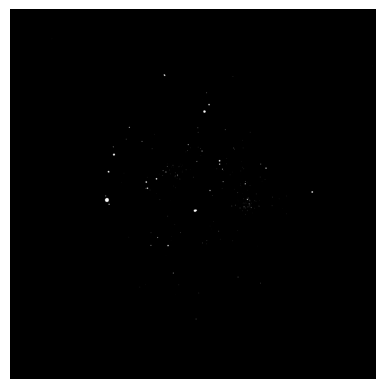

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像ファイルのパスを指定してください
image_path = 'testA1.tiff'
img = Image.open(image_path).convert("L")
img = np.array(img).astype(np.uint8)
# --- 通常の二値化 ---
_, mask = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.gray()
plt.imshow(mask)
plt.axis("off")

In [ ]:
from skimage.measure import label, regionprops

label_img = label(mask)

# --- 粒子解析 ---
props = regionprops(label_img)
areas = [p.area for p in props]
diameters = [2 * np.sqrt(p.area / np.pi) for p in props]

# --- 結果の集計例 ---
print(f"粒子数: {len(props)}")
print(f"平均面積: {np.mean(areas):.1f} px²")
print(f"平均円相当径: {np.mean(diameters):.1f} px")

粒子数: 220
平均面積: 21.8 px²
平均円相当径: 3.6 px


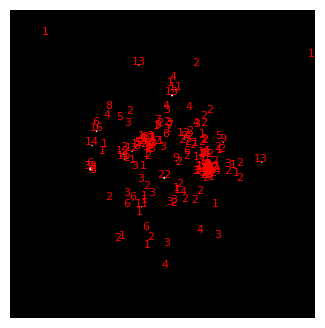

In [ ]:

# --- 結果の描画 ---
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(mask, cmap='gray')
for p in props:
    y, x = p.centroid
    ax.text(x, y, f"{int(2*np.sqrt(p.area/np.pi))}", color='red', fontsize=8, ha='center')
ax.axis('off')
plt.show()



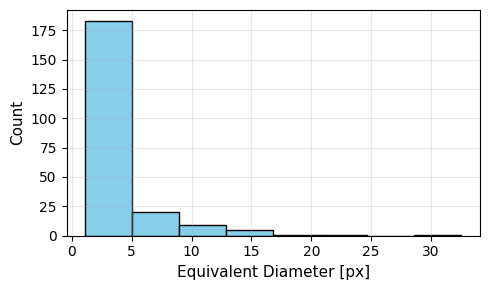

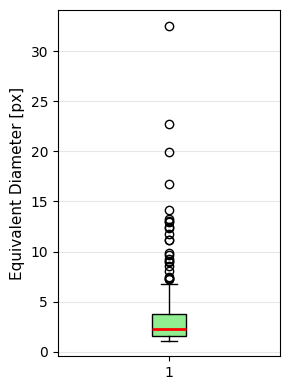

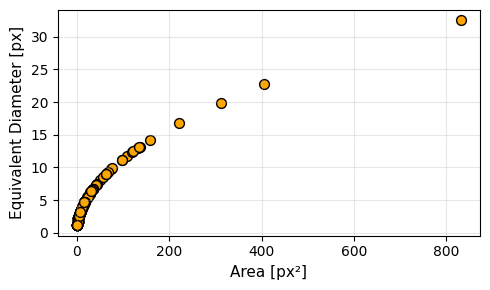

In [ ]:


# ① ヒストグラム ------------------------------------------------
plt.figure(figsize=(5,3))
plt.hist(diameters, bins=8, color='skyblue', edgecolor='black')
plt.xlabel("Equivalent Diameter [px]", fontsize=11)
plt.ylabel("Count", fontsize=11)
#plt.title("粒径分布ヒストグラム", fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ② 箱ひげ図 ------------------------------------------------
plt.figure(figsize=(3,4))
plt.boxplot(diameters, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel("Equivalent Diameter [px]", fontsize=11)
#plt.title("円相当径の箱ひげ図", fontsize=13)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ③ 散布図 ------------------------------------------------
plt.figure(figsize=(5,3))
plt.scatter(areas, diameters, color='orange', edgecolors='black', s=50)
plt.xlabel("Area [px²]", fontsize=11)
plt.ylabel("Equivalent Diameter [px]", fontsize=11)
#plt.title("面積と円相当径の関係（散布図）", fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()